In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

warnings.filterwarnings("ignore")
train_dir = '/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Training'
test_dir = '/kaggle/input/datasets/masoudnickparvar/brain-tumor-mri-dataset/Testing'
img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.10,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    rotation_range=90,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation',
    shuffle=False,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [41]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import numpy as np

classes = train_generator.classes
weights = compute_class_weight(class_weight='balanced', classes=np.unique(classes), y=classes)
class_weights = dict(zip(np.unique(classes), weights))

CNN1 = Sequential()

CNN1.add(Conv2D(64, (3,3), activation='relu', input_shape=(128,128,1), kernel_regularizer=regularizers.l2(0.01)))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(2,2))

CNN1.add(Conv2D(96, (3,3), activation='relu'))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(2,2))

CNN1.add(Conv2D(128, (3,3), activation='relu'))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(2,2))

CNN1.add(Conv2D(128, (3,3), activation='relu'))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(2,2))

CNN1.add(Conv2D(256, (3,3), activation='relu'))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(2,2))

CNN1.add(GlobalAveragePooling2D())

CNN1.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
CNN1.add(BatchNormalization())
CNN1.add(Dropout(0.5))

CNN1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
CNN1.add(BatchNormalization())
CNN1.add(Dropout(0.4))

CNN1.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
CNN1.add(BatchNormalization())
CNN1.add(Dropout(0.3))


CNN1.add(Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=1e-4)
CNN1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
CNN1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 61, 61, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 61, 61, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 30, 30, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 28, 28, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │             

 Total params: 656,452 (2.50 MB)

 Trainable params: 654,660 (2.50 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks = [
      EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
      ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1),
      ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
  ]

In [43]:
history = CNN1.fit(train_generator, validation_data=val_generator, callbacks=[callbacks], epochs=20)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6165 - loss: 3.5654
Epoch 1: val_loss did not improve from 3.52142
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.6165 - loss: 3.5654 - val_accuracy: 0.6556 - val_loss: 3.5863 - learning_rate: 3.1250e-06
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6678 - loss: 3.5027
Epoch 2: val_loss did not improve from 3.52142
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.6676 - loss: 3.5030 - val_accuracy: 0.6486 - val_loss: 3.5956 - learning_rate: 3.1250e-06
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6459 - loss: 3.5082
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.

Epoch 3: val_loss did not improve from 3.52142
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.6459 - loss: 3.5083 - val_accuracy: 0.6354 - val_loss: 3.6548 - learning_rate: 3.1250e-06
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6320 - los

In [32]:
test_loss, test_acc = CNN1.evaluate(test_generator, verbose=1)
print("Test accuracy:", test_acc)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6517 - loss: 8.2973
Test accuracy: 0.7940503358840942


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step


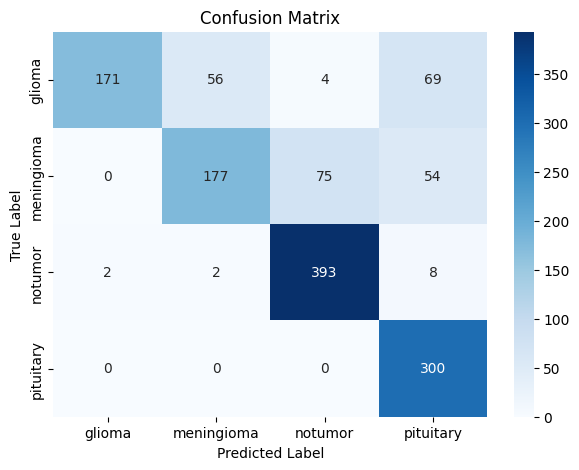

              precision    recall  f1-score   support

      glioma     0.9884    0.5700    0.7230       300
  meningioma     0.7532    0.5784    0.6543       306
     notumor     0.8326    0.9704    0.8962       405
   pituitary     0.6961    1.0000    0.8208       300

    accuracy                         0.7941      1311
   macro avg     0.8176    0.7797    0.7736      1311
weighted avg     0.8185    0.7941    0.7829      1311



In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

  # Predict on test set
test_generator.reset()
y_prob = CNN1.predict(test_generator, verbose=1)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_generator.classes

# Class names in correct index order
class_names = [k for k, v in sorted(test_generator.class_indices.items(), key=lambda x: x[1])]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
  cm,
  annot=True,
  fmt='d',
  cmap='Blues',
  xticklabels=class_names,
  yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: detailed report (precision/recall/F1)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))